In [7]:
import pandas as pd
df =  pd.read_csv('./data/TG_STAID002759.txt',header=14, index_col=1, parse_dates=True)

# Remove data before missing values

In [8]:
df: pd.DataFrame = df[df.index.year > 1945]
df 

,SOUID,TG,Q_TG
DATE,,,
1946-01-01,127488,-34,0
1946-01-02,127488,-30,0
1946-01-03,127488,-28,0
1946-01-04,127488,-27,0
1946-01-05,127488,14,0
...,...,...,...
2022-09-26,111448,136,0
2022-09-27,111448,112,0
2022-09-28,111448,94,0


In [9]:
from format import format_data_frame

df = format_data_frame(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28032 entries, 1946-01-01 to 2022-09-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SOUID   28032 non-null  int64  
 1   temp_c  28032 non-null  float64
 2   Q_TG    28032 non-null  int64  
 3   month   28032 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 MB


In [11]:
df.describe()

,SOUID,temp_c,Q_TG,month
count,28032.000000,28032.000000,28032.000000,28032.000000
mean,111873.966895,9.881111,0.000036,6.508276
std,2605.575399,7.928787,0.005973,3.444521
min,111448.000000,-18.500000,0.000000,1.000000
25%,111448.000000,3.800000,0.000000,4.000000
50%,111448.000000,10.000000,0.000000,7.000000
75%,111448.000000,16.200000,0.000000,9.000000
max,128124.000000,30.500000,1.000000,12.000000


In [12]:
df['time_step'] = range(len(df))
df

,SOUID,temp_c,Q_TG,month,time_step
DATE,,,,,
1946-01-01,127488,-3.4,0,1,0
1946-01-02,127488,-3.0,0,1,1
1946-01-03,127488,-2.8,0,1,2
1946-01-04,127488,-2.7,0,1,3
1946-01-05,127488,1.4,0,1,4
...,...,...,...,...,...
2022-09-26,111448,13.6,0,9,28027
2022-09-27,111448,11.2,0,9,28028
2022-09-28,111448,9.4,0,9,28029


# Model the trend

In [ ]:
from sklearn.linear_model import LinearRegression

x = df[['time_step']]
y = df['temp_c']


m =  LinearRegression()

m.fit(x, y )


# We base the prediction of the trend based purely off using the linear relationship between the time step and the temperature
df['trend'] = m.predict(x)

df[['temp_c', 'trend']].plot()

m.coef_

NameError: name 'df' is not defined

In [7]:
# Make a new feature with the new value of the temperature without the general trend included
df['temp_c_wo_trend'] = df['temp_c'] - df['trend']
df

,SOUID,temp_c,Q_TG,month,time_step,trend,temp_c_wo_trend
DATE,,,,,,,
1946-01-01,127488,-3.4,0,1,0,8.909753,-12.309753
1946-01-02,127488,-3.0,0,1,1,8.909822,-11.909822
1946-01-03,127488,-2.8,0,1,2,8.909892,-11.709892
1946-01-04,127488,-2.7,0,1,3,8.909961,-11.609961
1946-01-05,127488,1.4,0,1,4,8.910030,-7.510030
...,...,...,...,...,...,...,...
2022-09-26,111448,13.6,0,9,28027,10.852191,2.747809
2022-09-27,111448,11.2,0,9,28028,10.852261,0.347739
2022-09-28,111448,9.4,0,9,28029,10.852330,-1.452330


# Lets extract the seasonality from the temperature variance

<AxesSubplot:xlabel='    DATE'>

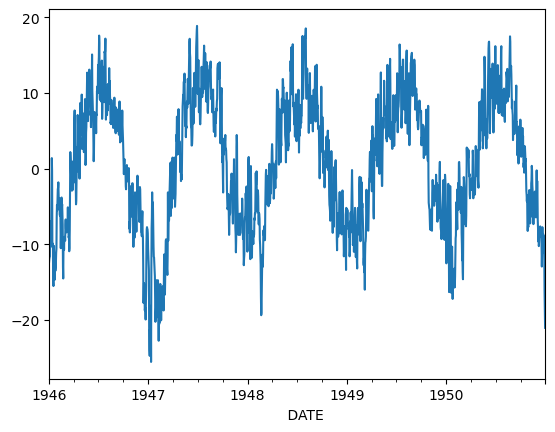

In [8]:
# The first five years as an example
df['temp_c_wo_trend'][:365 * 5].plot()

## We plot here the aggregated months over all the years to see the average

<AxesSubplot:xlabel='month'>

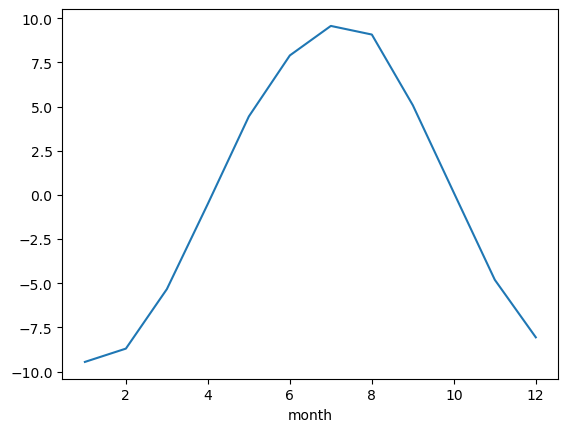

In [9]:
df.groupby('month')['temp_c_wo_trend'].mean().plot()

<AxesSubplot:xlabel='    DATE'>

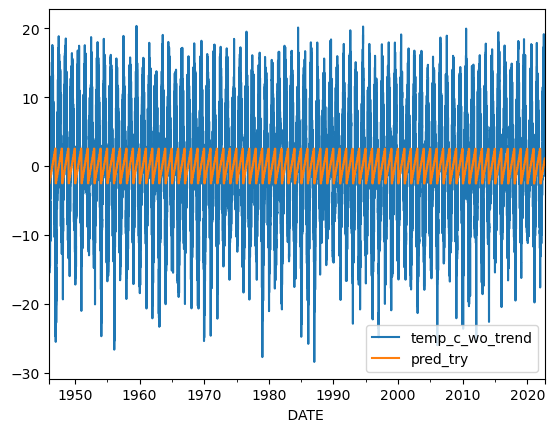

In [13]:
# Don't do this because You cannot plot a lone on the curve above so we need to one hot encode the months
# X = df[['time_step', 'month']]
# y = df['temp_c_wo_trend']
# m.fit(X,y)
# df['pred_try'] = m.predict(X)
# df[['temp_c_wo_trend','pred_try']].plot()

month_dummies = pd.get_dummies(df['month'] ,prefix ='month', drop_first= True)
month_dummies
# join
X = month_dummies
y= df['passengers']
# drop month column
m.fit(X,y)
df['seasonal_prediction'] = m.predict(X)
df[['passengers', 'seasonal_prediction']].plot()
